In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df= pd.read_csv("rumah_jaksel.csv",encoding='windows-1252')
df

,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


## data cleaning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NAMA RUMAH  1010 non-null   object
 1   HARGA       1010 non-null   int64 
 2   LB          1010 non-null   int64 
 3   LT          1010 non-null   int64 
 4   KT          1010 non-null   int64 
 5   KM          1010 non-null   int64 
 6   GRS         1010 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 55.4+ KB


In [24]:
df['HARGA']=df['HARGA']/1000000000
df


,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3.80,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4.60,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3.00,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",0.43,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9.00,400,355,6,5,3
...,...,...,...,...,...,...,...
1005,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9.00,450,550,10,10,3
1006,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4.00,160,140,4,3,2
1007,"Di Kebun Baru Rumah Terawat, Area Strategis",4.00,139,230,4,4,1
1008,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19.00,360,606,7,4,0


In [25]:
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946,177.864557,179.957604,1.572776,1.420066,1.510998
min,0.430000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


C:\Users\user\AppData\Local\Temp\ipykernel_724\600980528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")


<AxesSubplot: >

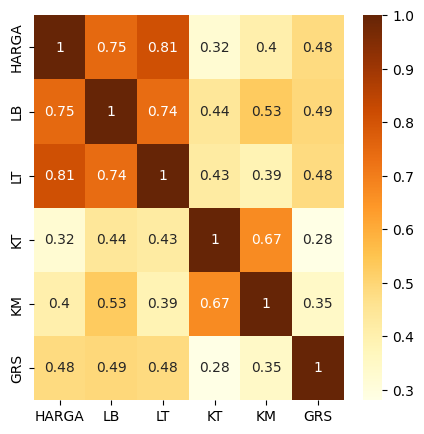

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [27]:
from sklearn.model_selection import train_test_split
X=df.drop(columns="HARGA")
y=df.HARGA

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

#regresi tidak pake stratify

((707, 6), (303, 6), (707,), (303,))

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler,StandardScaler

numerical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

categorical_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder())
])  
  
from sklearn.compose import ColumnTransformer  
preprocessor= ColumnTransformer([ 
    ("numeric",numerical_pipeline,['LB','LT','KT','KM','GRS']),
    ('categoric',categorical_pipeline,[])
])
  
from sklearn.neighbors import KNeighborsRegressor
pipeline=Pipeline([
        ("prep",preprocessor),
        ("algo",KNeighborsRegressor())
])

In [29]:
from sklearn.model_selection import GridSearchCV  
parameter = {
    "algo__n_neighbors":range(1,51,2),
    "algo__weights":['uniform','distance']
}
model=GridSearchCV(pipeline,param_grid=parameter,cv=4,n_jobs=1,verbose=1)
model.fit(X_train,y_train)
print(model.best_params_)
print(model.score(X_train,y_train),model.score(X_test,y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'algo__n_neighbors': 17, 'algo__weights': 'distance'}
0.9967340607988583 0.6119472264768882


In [30]:
soal=pd.DataFrame({'LB':[40],
                   'LT':[100],
                   'KT':[3],
                   'KM':[2],
                   'GRS':[1],
})
prediksi=model.predict(soal)

print(prediksi)

[2.45217343]


In [31]:
df_test=pd.DataFrame(y_test).reset_index(drop=True)

df_test['prediction']=pd.DataFrame(model.predict(X_test))

from sklearn.metrics import mean_absolute_error 
mae= mean_absolute_error(df_test.HARGA, df_test.prediction)

In [32]:
print("Mean absolute error : " + str(mae))

Mean absolute error : 1.99048691238755


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(df_test.HARGA, df_test.prediction))
print("Root Mean squared error : " + str(rms))

Root Mean squared error : 4.8455169602801975


In [34]:
from sklearn.metrics import r2_score
r2=r2_score(df_test.HARGA, df_test.prediction)
print("R Square : " + str(r2)) 

R Square : 0.6119472264768882


In [35]:
#import pickle
#with open('model.pkl', 'wb') as file:
    #pickle.dump(model, file)